# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Inpainting to Restore Damaged Photos</h2>

<h5 style="margin-top:5px;">In this lesson we'll take a damaged old photo, and restore it using the inpaint() function.</h5>

In [5]:
# Our Setup, Import Libraries and Create our Imshow Function
import numpy as np
import cv2
import time
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip

/home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=9d518024-494c-4f2b-a0b6-47d7f795a92c
To: /home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/8.OpenCV_Projects/images.zip
100%|██████████████████████████████████████| 29.6M/29.6M [00:03<00:00, 8.93MB/s]


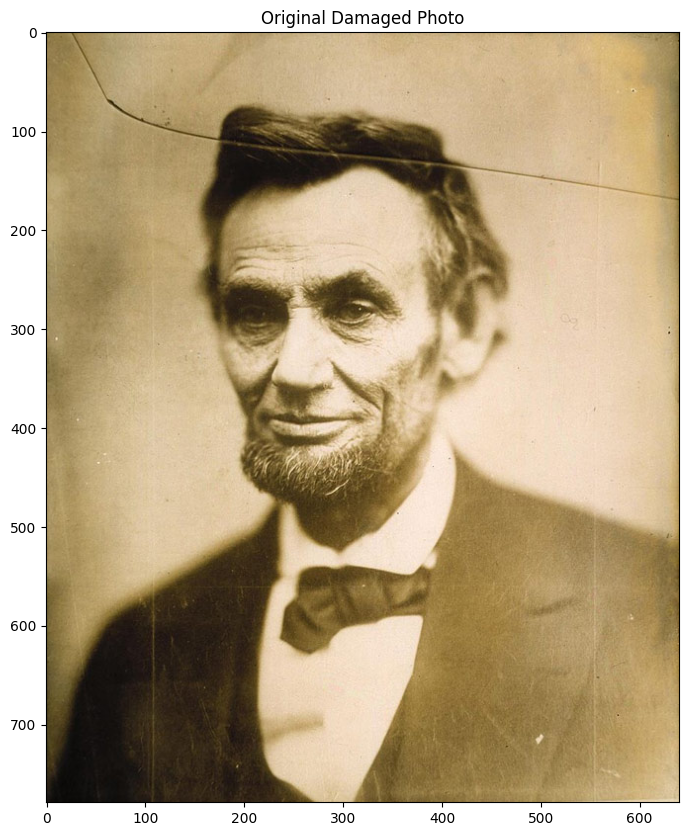

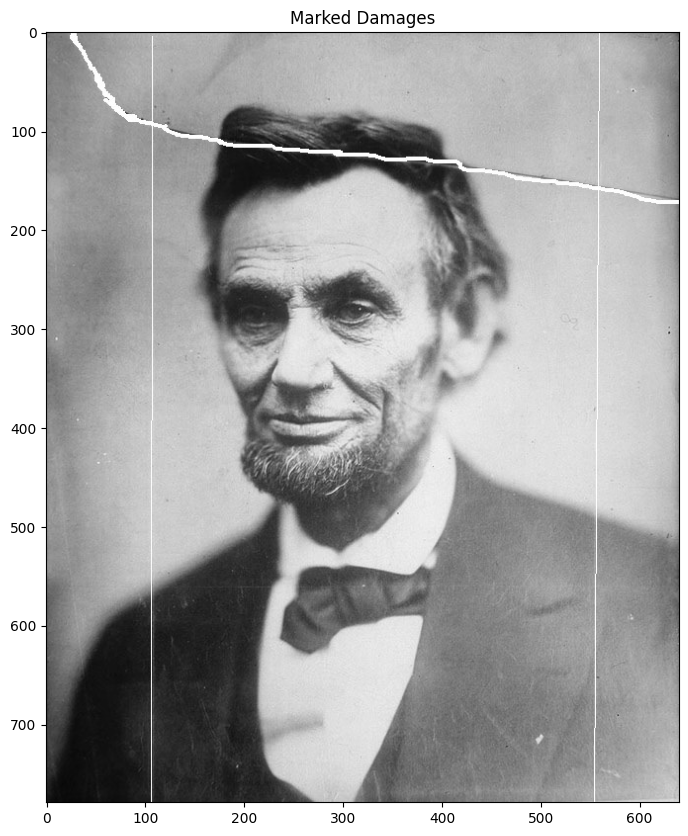

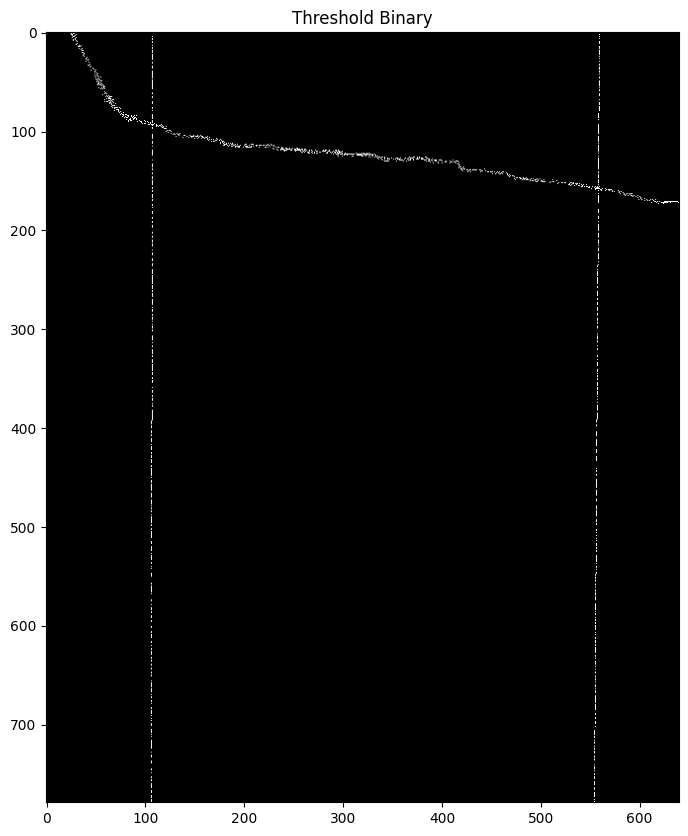

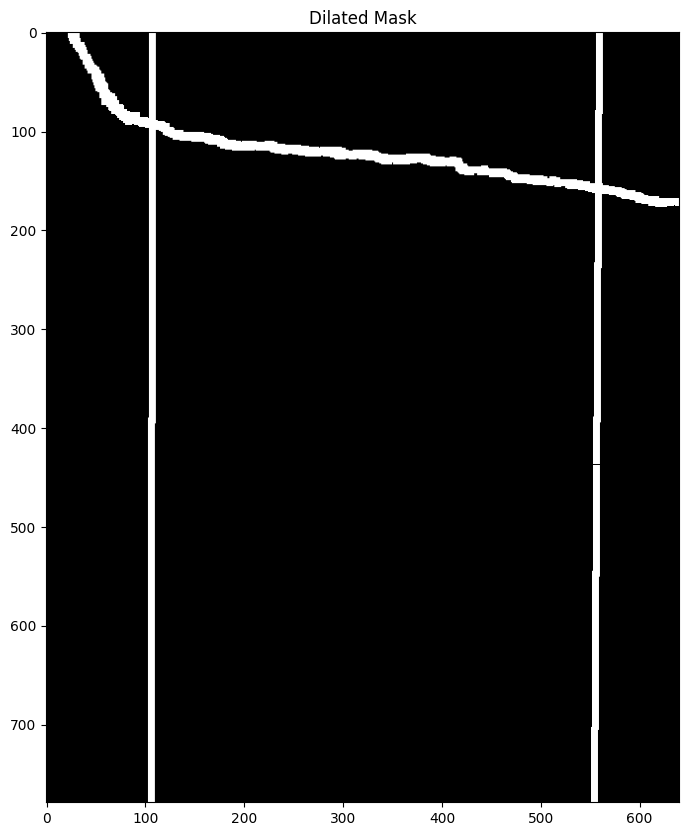

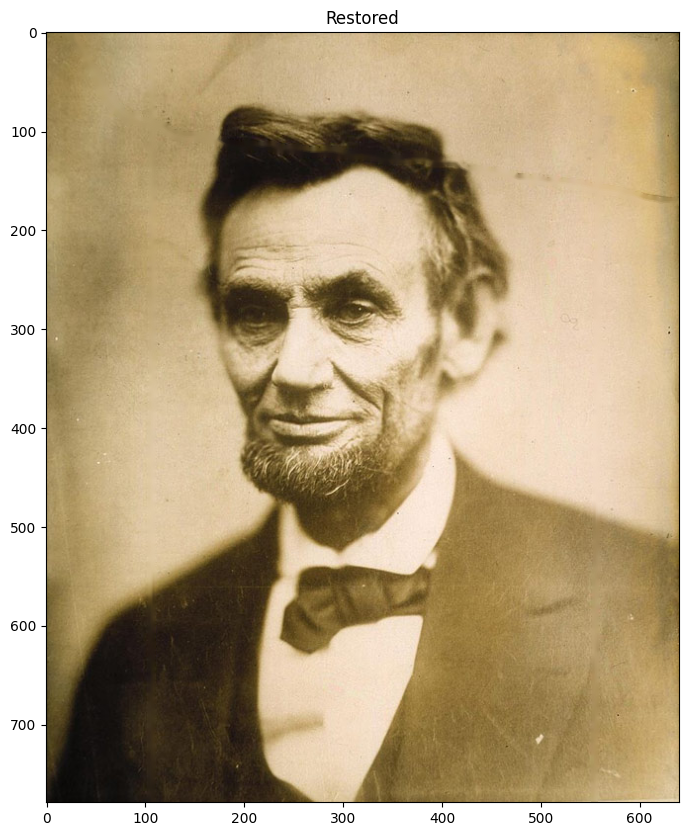

In [6]:
# Load our damaged photo
image = cv2.imread('../images/abraham.jpg')
imshow('Original Damaged Photo', image)

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('../images/mask.jpg', 0)
imshow('Marked Damages', marked_damages)

# Let's make a mask out of our marked image be changing all colour
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# Let's dilate (make thicker) our masks
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
imshow('Dilated Mask', mask)

restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

imshow('Restored', restored)